In [1]:
from scipy import spatial
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
ds = pd.read_csv("Ratings.csv")
ds.shape

(100004, 4)

In [2]:
ds.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [3]:
movie = ds.pivot_table(index='userId', columns='movieId', values='rating')
movie=np.nan_to_num(movie,nan=0)
print(movie)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [4. 0. 0. ... 0. 0. 0.]
 [5. 0. 0. ... 0. 0. 0.]]


In [4]:
movie.shape

(671, 9066)

In [5]:
c_movie=movie[0:100,0:500]
print(c_movie)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [4. 2. 0. ... 0. 0. 0.]
 [4. 0. 4. ... 0. 0. 0.]]


In [6]:
user_r=0
user_rech=int(input("Enter the number of users to search for: "))
film_rech=int(input("Enter the number of movies to search for: "))
p=c_movie[user_rech-1][film_rech-1]
Maxuser=[]
k = int(input("Enter number of neighbors (k): "))

nbrs = NearestNeighbors(n_neighbors=k+1, metric='cosine').fit(c_movie)
distances, indices = nbrs.kneighbors([c_movie[user_rech-1]])
for i in range(1,k+1):
    Maxuser.append(indices[0][i])
for n in Maxuser:
    user_r=user_r+c_movie[n][film_rech-1]
user_r=user_r/k
c_movie[user_rech-1][film_rech-1] = user_r
print(c_movie)
c_movie[user_rech-1][film_rech-1]=p
print(Maxuser)

Enter the number of users to search for:  1
Enter the number of movies to search for:  1
Enter number of neighbors (k):  50


[[1.76 0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 0.   0.   0.  ]
 [4.   2.   0.   ... 0.   0.   0.  ]
 [4.   0.   4.   ... 0.   0.   0.  ]]
[95, 30, 31, 6, 87, 38, 72, 35, 59, 97, 96, 94, 93, 92, 91, 90, 98, 89, 80, 81, 77, 78, 79, 75, 84, 83, 74, 86, 88, 73, 60, 61, 62, 63, 64, 57, 65, 66, 58, 56, 68, 69, 70, 71, 55, 85, 76, 53, 67, 82]


In [7]:
user_r=0
user_rech=int(input("Enter the number of users to search for: "))
film_rech=int(input("Enter the number of movies to search for: "))
p=c_movie[user_rech-1][film_rech-1]
Maxuser=[]
k = int(input("Enter number of neighbors (k): "))

nbrs = NearestNeighbors(n_neighbors=k+1, metric='euclidean').fit(c_movie)
distances, indices = nbrs.kneighbors([c_movie[user_rech-1]])
for i in range(1,k+1):
    Maxuser.append(indices[0][i])
for n in Maxuser:
    user_r=user_r+c_movie[n][film_rech-1]
user_r=user_r/k
c_movie[user_rech-1][film_rech-1] = user_r
print(c_movie)
c_movie[user_rech-1][film_rech-1]=p
print(Maxuser)

Enter the number of users to search for:  1
Enter the number of movies to search for:  1
Enter number of neighbors (k):  50


[[1.01 0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 0.   0.   0.  ]
 [4.   2.   0.   ... 0.   0.   0.  ]
 [4.   0.   4.   ... 0.   0.   0.  ]]
[13, 70, 28, 50, 44, 64, 11, 53, 95, 51, 34, 39, 36, 75, 61, 52, 5, 45, 32, 57, 78, 15, 83, 24, 10, 9, 97, 27, 26, 48, 80, 60, 96, 2, 65, 89, 59, 99, 23, 43, 71, 30, 8, 73, 86, 12, 42, 62, 19, 58]


In [8]:
user_r = 0
user_rech=int(input("Enter the number of users to search for: "))
film_rech=int(input("Enter the number of movies to search for: "))
p=c_movie[user_rech-1][film_rech-1]
Maxuser = []

k = int(input("Enter number of neighbors (k): "))

nbrs = NearestNeighbors(n_neighbors=k+1, metric='correlation').fit(c_movie)
distances, indices = nbrs.kneighbors([c_movie[user_rech-1]])

for i in range(1, k+1):
    Maxuser.append(indices[0][i])

for n in Maxuser:
    user_r = user_r + c_movie[n][film_rech-1]

user_r = user_r / k
c_movie[user_rech-1][film_rech-1] = user_r

print(c_movie)
c_movie[user_rech-1][film_rech-1]=p
print(Maxuser)

Enter the number of users to search for:  1
Enter the number of movies to search for:  1
Enter number of neighbors (k):  50


[[0.92 0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 0.   0.   0.  ]
 [4.   2.   0.   ... 0.   0.   0.  ]
 [4.   0.   4.   ... 0.   0.   0.  ]]
[95, 30, 31, 6, 87, 38, 72, 35, 53, 44, 64, 36, 39, 45, 51, 11, 75, 61, 5, 34, 27, 15, 10, 57, 9, 26, 83, 52, 97, 24, 32, 59, 65, 73, 80, 78, 2, 89, 8, 48, 60, 96, 23, 12, 41, 37, 99, 71, 43, 86]


In [9]:
user_r = 0
user_rech=int(input("Enter the number of users to search for: "))
film_rech=int(input("Enter the number of movies to search for: "))
p=c_movie[user_rech-1][film_rech-1]
Maxuser = []

k = int(input("Enter number of neighbors (k): "))

nbrs = NearestNeighbors(n_neighbors=k+1, metric='jaccard').fit(c_movie)
distances, indices = nbrs.kneighbors([c_movie[user_rech-1]])

for i in range(1, k+1):
    Maxuser.append(indices[0][i])

for n in Maxuser:
    user_r = user_r + c_movie[n][film_rech-1]

user_r = user_r / k
c_movie[user_rech-1][film_rech-1] = user_r

print(c_movie)
c_movie[user_rech-1][film_rech-1]=p
print(Maxuser)

Enter the number of users to search for:  1
Enter the number of movies to search for:  1
Enter number of neighbors (k):  50


[[1.76 0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 0.   0.   0.  ]
 [4.   2.   0.   ... 0.   0.   0.  ]
 [4.   0.   4.   ... 0.   0.   0.  ]]
[95, 30, 6, 31, 38, 87, 35, 72, 60, 97, 96, 94, 93, 92, 91, 90, 89, 74, 80, 81, 77, 78, 79, 75, 84, 83, 98, 86, 88, 73, 61, 62, 63, 64, 58, 65, 66, 57, 59, 67, 56, 69, 70, 71, 55, 85, 76, 53, 68, 82]


C:\Users\yassi\anaconda3\Lib\site-packages\sklearn\metrics\pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


In [10]:
ds=ds.reindex(columns=["userId","movieId","timestamp","rating"])
ds.head()

,userId,movieId,timestamp,rating
0,1,31,1260759144,2.5
1,1,1029,1260759179,3.0
2,1,1061,1260759182,3.0
3,1,1129,1260759185,2.0
4,1,1172,1260759205,4.0


In [11]:
#KNN!!
#Now, we will transform the data using iloc to access the required data and .values property to get the output as an array
# We are storing all rows and first 3 columns in x, and the rating column in y.
x = ds.iloc[:,:2].values
y = ds['rating'].values.astype(int)
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.2, random_state=0)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
#Knn 
#two classifiers with k values of 5 and 10 to demonstrate the relevance of the k value.
#The models are then trained using a train set.
# Prepare data
knn5 = KNeighborsClassifier(n_neighbors = 5)
knn10 = KNeighborsClassifier(n_neighbors=10)
knn20 = KNeighborsClassifier(n_neighbors=20)
knn50 = KNeighborsClassifier(n_neighbors=50)
knn5.fit(x_train, y_train)
knn10.fit(x_train, y_train)
knn20.fit(x_train, y_train)
knn50.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=50)

In [13]:
#Predictions for the KNN Classifiers
#In the test set, we forecast the target values and compare them to the actual values.
y_pred_5 = knn5.predict(x_test)
y_pred_10 = knn10.predict(x_test)
y_pred_20=knn20.predict(x_test)
y_pred_50=knn50.predict(x_test)

In [14]:
#Predict Accuracy for both k values
from sklearn.metrics import accuracy_score
print("Accuracy with k=5", accuracy_score(y_test, y_pred_5)*100)
print("Accuracy with k=10", accuracy_score(y_test, y_pred_10)*100)
print("Accuracy with k=20", accuracy_score(y_test, y_pred_20)*100)
print("Accuracy with k=50", accuracy_score(y_test, y_pred_50)*100)

Accuracy with k=5 32.88835558222089
Accuracy with k=10 34.54327283635818
Accuracy with k=20 35.59322033898305
Accuracy with k=50 36.63316834158292


In [15]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred_5))
print(confusion_matrix(y_test,y_pred_5))
#Support is the number of actual occurrences of the class in the specified dataset.

              precision    recall  f1-score   support

           0       0.03      0.02      0.03       218
           1       0.11      0.09      0.10       955
           2       0.18      0.15      0.16      2374
           3       0.34      0.42      0.38      6175
           4       0.40      0.43      0.41      7298
           5       0.27      0.14      0.19      2981

    accuracy                           0.33     20001
   macro avg       0.22      0.21      0.21     20001
weighted avg       0.32      0.33      0.32     20001

[[   5   14   29   75   79   16]
 [  13   84  143  376  285   54]
 [  32  126  360  956  792  108]
 [  40  222  684 2593 2260  376]
 [  41  224  617 2688 3110  618]
 [  12   68  204  961 1310  426]]


In [16]:
print(classification_report(y_test,y_pred_10))
print(confusion_matrix(y_test,y_pred_10))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       218
           1       0.16      0.05      0.08       955
           2       0.20      0.12      0.15      2374
           3       0.34      0.43      0.38      6175
           4       0.39      0.48      0.43      7298
           5       0.29      0.13      0.18      2981

    accuracy                           0.35     20001
   macro avg       0.23      0.20      0.20     20001
weighted avg       0.32      0.35      0.32     20001

[[   0   10   18   93   87   10]
 [   1   52  104  397  355   46]
 [   2   53  281  945 1001   92]
 [   2   92  463 2676 2653  289]
 [   6   87  431 2756 3501  517]
 [   0   25  132  953 1472  399]]


In [17]:
print(classification_report(y_test,y_pred_20))
print(confusion_matrix(y_test,y_pred_20))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       218
           1       0.18      0.02      0.03       955
           2       0.17      0.05      0.08      2374
           3       0.34      0.43      0.38      6175
           4       0.39      0.55      0.45      7298
           5       0.31      0.10      0.16      2981

    accuracy                           0.36     20001
   macro avg       0.23      0.19      0.18     20001
weighted avg       0.32      0.36      0.32     20001

[[   0    2   12   81  118    5]
 [   0   15   65  409  435   31]
 [   0   17  130 1034 1130   63]
 [   1   21  250 2653 3031  219]
 [   0   23  231 2648 4010  386]
 [   1    5   56  936 1672  311]]


In [18]:
print(classification_report(y_test,y_pred_50))
print(confusion_matrix(y_test,y_pred_50))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       218
           1       0.40      0.01      0.01       955
           2       0.17      0.01      0.03      2374
           3       0.34      0.40      0.37      6175
           4       0.38      0.64      0.48      7298
           5       0.35      0.06      0.11      2981

    accuracy                           0.37     20001
   macro avg       0.27      0.19      0.17     20001
weighted avg       0.34      0.37      0.31     20001

[[   0    2    3   79  131    3]
 [   0    6   23  413  496   17]
 [   0    0   33  982 1333   26]
 [   0    4   73 2445 3558   95]
 [   0    1   54 2381 4654  208]
 [   0    2   10  849 1931  189]]


C:\Users\yassi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yassi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yassi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

pred_ratings = ds['rating'].values.astype(int)
pred_ratings = pred_ratings[:20001]

# Set threshold to determine relevance of items
seuil = 2.5

# Define lists for real and predicted ratings
vrais_ratings = [1 if rating >= seuil else 0 for rating in vrais_ratings]
pred_ratings = [1 if rating >= seuil else 0 for rating in pred_ratings]

# calculate the confusion matrix
conf_matrix = confusion_matrix(vrais_ratings, pred_ratings)

print(conf_matrix)

precision = precision_score(vrais_ratings,pred_ratings)
recall = recall_score(vrais_ratings, pred_ratings)
f1_score = f1_score(vrais_ratings, pred_ratings)
accuracy = accuracy_score(vrais_ratings, pred_ratings)
mse = mean_squared_error(vrais_ratings, pred_ratings)

# View performance metrics
print('Accuracy : {:.2f}'.format(accuracy))
print('Precision : {:.2f}'.format(precision))
print('Recall : {:.2f}'.format(recall))
print('F1-score : {:.2f}'.format(f1_score))
print('Mean Squared Error : {:.2f}'.format(mse))

NameError: name 'vrais_ratings' is not defined

In [20]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error

vrais_ratings = ds['rating'].values.astype(int)
vrais_ratings = vrais_ratings[:20001]

# Initialization of the decision tree
dtc = DecisionTreeClassifier()

# Drive model on drive data
dtc.fit(x_train, y_train)

# Predicting tags for test data
pred_ratings = dtc.predict(x_test)

# Set threshold to determine relevance of items
seuil = 2.5

# Define lists for real and predicted ratings
vrais_ratings = [1 if rating >= seuil else 0 for rating in vrais_ratings]
pred_ratings = [1 if rating >= seuil else 0 for rating in pred_ratings]

# calculate the confusion matrix
conf_matrix = confusion_matrix(vrais_ratings, pred_ratings)

print(conf_matrix)

precision = precision_score(vrais_ratings,pred_ratings)
recall = recall_score(vrais_ratings, pred_ratings)
f1_score = f1_score(vrais_ratings, pred_ratings)
accuracy = dtc.score(x_test, y_test)

# View performance metrics
print('Accuracy : {:.2f}'.format(accuracy))
print('Precision : {:.2f}'.format(precision))
print('Recall : {:.2f}'.format(recall))
print('F1-score : {:.2f}'.format(f1_score))

[[  646  2885]
 [ 2997 13473]]
Accuracy : 0.34
Precision : 0.82
Recall : 0.82
F1-score : 0.82


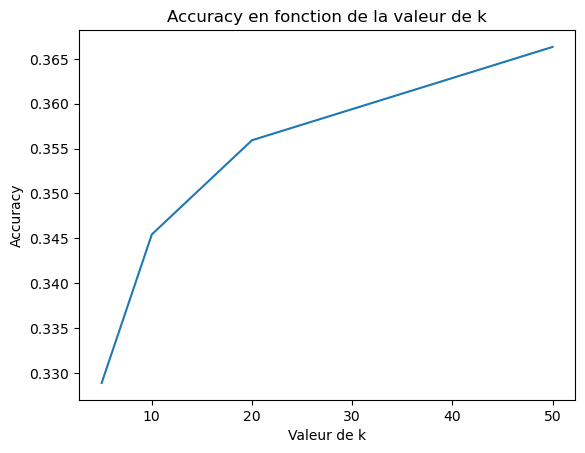

In [21]:
import matplotlib.pyplot as plt

# List of values of k to be tested
k_values = [5, 10, 20, 50]

# List to store details for each value of k
accuracies = []

# For each value of k, drive the model and calculate the accuracy
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot the precision graph according to the value of k
plt.plot(k_values, accuracies)
plt.xlabel('Valeur de k')
plt.ylabel('Accuracy')
plt.title('Accuracy en fonction de la valeur de k')
plt.show()